## <center> Deep Learning : Theory and Practices <center>
## <center> Assignment 2 <center>

### <center> Problem-1 <center>

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

- In the first problem we need to learn a linear function given as follows:
\begin{equation}
    y = 2x_{1} + 3x_{2} + \epsilon
\end{equation}
where $\epsilon \sim \mathcal{N}(0,0.01) \ (\mathcal{N}$ is the Gaussain distribution).
- The linear function must pass through origin (as bias is $0$).

### 1.1 Objective Function

- Let the weight matrix be given as follows:
\begin{equation}
    W = \begin{bmatrix}w_{1} \\ w_{2} \\ 0\end{bmatrix} \in R^{3 \times 1}
\end{equation}
- The samples and coefficient matrices are as follows:
\begin{equation}
    X = \begin{bmatrix}x_{1} \\ x_{2} \\ 1\end{bmatrix} \in R^{3 \times 400}\\
    C = \begin{bmatrix}2 \\ 3 \\ \epsilon\end{bmatrix} \in R^{3 \times 1}
\end{equation}
- The objective function $J(W)$ is given as:
\begin{equation}
    J(W) = ((W - C)^{T}X)(X^{T}(W-C))\\
    J(w_{1},w_{2}) = \sum_{i=1}^{400}\bigg[w_{1}x_{1i} + w_{2}x_{2i} - 2x_{1i} -3x_{2i} -\epsilon\bigg]^{2}
\end{equation}
- This loss function needs to be minimized with respect to $w_{1}, w{2}$.
- The gradient and Hessian of the given function is given as follows:
\begin{equation}
    J^{'}(W) = 2XX^{T}[W-C]\\
    J^{''}(W) = 2XX^{T}
\end{equation}

In [123]:
def plot_J(X,Y,Z):
    fig = plt.figure(figsize = (16,8))
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(X,Y,Z,color = 'green')
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('J(w1,w2)')
    plt.show()
    
def J_function(w1,w2,x1,x2,e):
    summation = 0
    
    for i in range(400):
        summation = summation + ((w1-2)*x1[i]+(w2-3)*x2[i]+(-e))**2
    return summation

def plot_contour(X,Y,Z,old_w):
    all_ws = np.array(old_w)
    
    fig,ax = plt.subplots(1,1,figsize = (16,8))
    cp = ax.contour(X,Y,Z,colors = 'black',linestyles = 'dashed',linewidths = 0.5)
    ax.clabel(cp,inline = 1,fontsize = 10)
    cp = ax.contourf(X,Y,Z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.colorbar(cp)
    for i in range(len(old_w)-1):
        ax.annotate('',xy = all_ws[i+1],xytext=all_ws[i],arrowprops={'arrowstyle': 'fancy','color':'r','lw':0.5},va='center',ha='center')
    plt.show()

def get_gradient(w,x,e):
    t = np.array((2,3,e))
    w = w-t
    q = 2*np.dot(x,np.dot(x.T,w))
    p = np.dot(np.dot(w.T,x),np.dot(x.T,w))
    
    return q,p

### 1.2 Plotting the error function

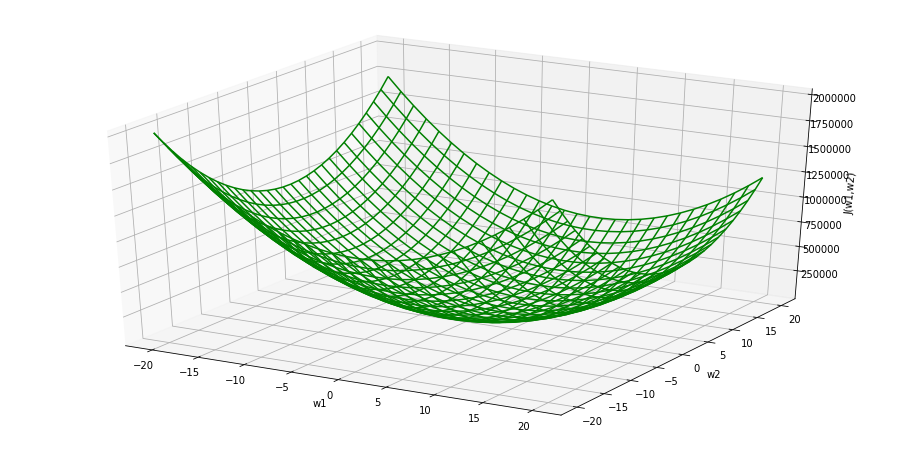

In [124]:
x1 = np.random.uniform(-4,4,400)
x2 = np.random.uniform(-4,4,400)
w1 = np.linspace(-20,20,30)
# x1 = x1 - 2
w2 = np.linspace(-20,20,30)
# x2 = x2 - 3
e = np.random.normal(0,0.01)
# x3 = x3-e

X,Y = np.meshgrid(w1,w2)

Z = J_function(X,Y,x1,x2,e)
plot_J(X,Y,Z)

- We see that it is a convex optiization function and can be minimized by gradient descent.

### 1.3 Deciding the learning rate

- We know that for a quadratic objective as given above, the $\eta_{opt}$ is given by:
\begin{equation}
    \eta_{opt} = [H(W)]^{-1}
\end{equation}
where $H$ is the hessian matrix.
- But we need a constant step size, so we take:
\begin{equation}
    \eta_{opt} = \frac{1}{\max_{i} \lambda_{i}}
\end{equation}
where $\lambda_{i}$ are the eigen values of the hessian matrix $H$.
- We do as shown below:
    - We first compute the Hessian matrix $H$ as $XX^{T}$.
    - Choose $max \lambda_{i}$ and compute $\eta_{opt}$ as given by the above equation.

In [125]:
def get_alpha(x):
    H = 2*np.dot(x,x.T)
    alpha = 1/max(np.linalg.eigvals(H))

    return alpha

### 1.4 Gradinet descent

Iteration: 0 - Error: 2013430.7948
Iteration: 5 - Error: 13296.8863
Iteration: 10 - Error: 469.4368
Iteration: 15 - Error: 173.9432
Iteration: 20 - Error: 76.7310
Iteration: 25 - Error: 33.9397
Iteration: 30 - Error: 15.0128
Iteration: 35 - Error: 6.6407
Iteration: 40 - Error: 2.9375
Iteration: 45 - Error: 1.2993
Iteration: 50 - Error: 0.5748
Iteration: 55 - Error: 0.2542
Iteration: 60 - Error: 0.1125
Iteration: 65 - Error: 0.0497
Iteration: 70 - Error: 0.0220
Iteration: 75 - Error: 0.0097
Iteration: 80 - Error: 0.0043
Iteration: 85 - Error: 0.0019
Completed Gradient Descent
W = [1.99993308 2.99990716 0.00716509] when alpha = 9.99790471384536e-05
Total number of epochs = 89

Part A for alpha = 9.99790471384536e-05


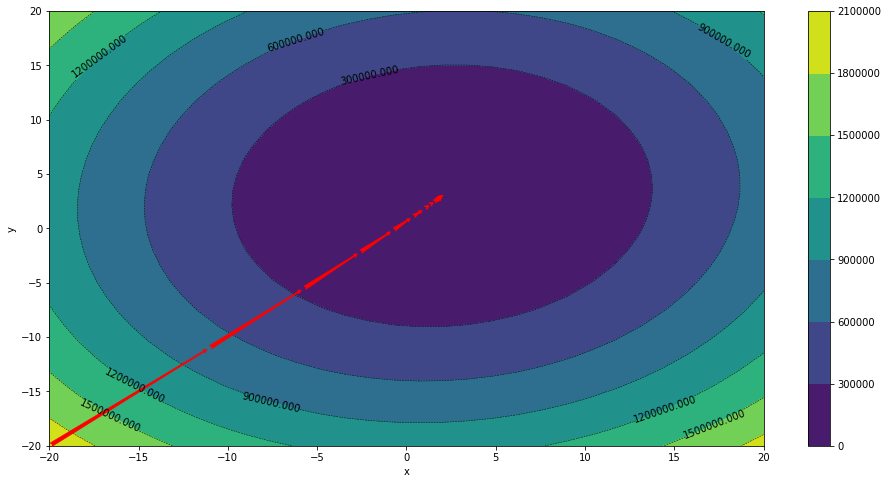


Part B for alpha = 9.99790471384536e-05


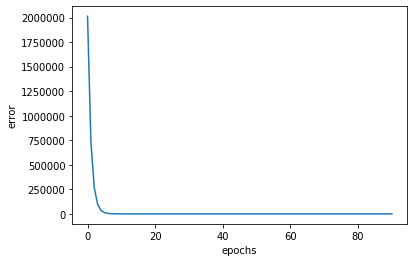


Iteration: 0 - Error: 2013430.7948
Iteration: 5 - Error: 531.7348
Iteration: 10 - Error: 122.1323
Iteration: 15 - Error: 30.1491
Iteration: 20 - Error: 7.4425
Iteration: 25 - Error: 1.8372
Iteration: 30 - Error: 0.4535
Iteration: 35 - Error: 0.1120
Iteration: 40 - Error: 0.0276
Iteration: 45 - Error: 0.0068
Iteration: 50 - Error: 0.0017
Completed Gradient Descent
W = [1.99993407 2.99990854 0.00714153] when alpha = 0.000166631745230756
Total number of epochs = 52

Part A for alpha = 0.000166631745230756


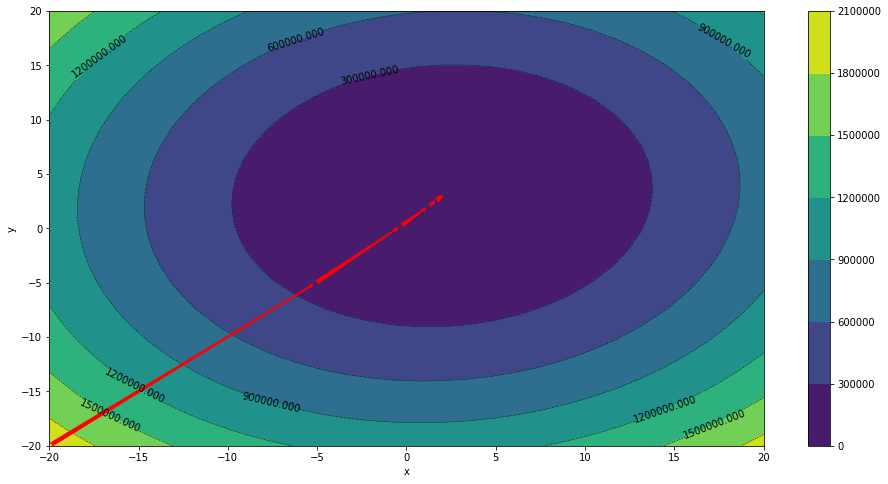


Part B for alpha = 0.000166631745230756


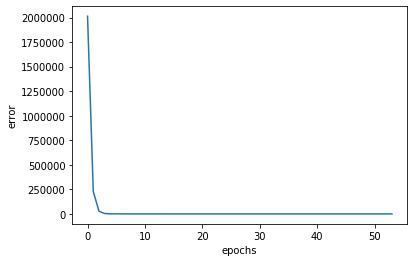


Iteration: 0 - Error: 2013430.7948
Iteration: 5 - Error: 296.0649
Iteration: 10 - Error: 43.7356
Iteration: 15 - Error: 6.4608
Iteration: 20 - Error: 0.9544
Iteration: 25 - Error: 0.1410
Iteration: 30 - Error: 0.0208
Iteration: 35 - Error: 0.0031
Completed Gradient Descent
W = [1.99993358 2.99990786 0.00715306] when alpha = 0.00022217566030767466
Total number of epochs = 38

Part A for alpha = 0.00022217566030767466


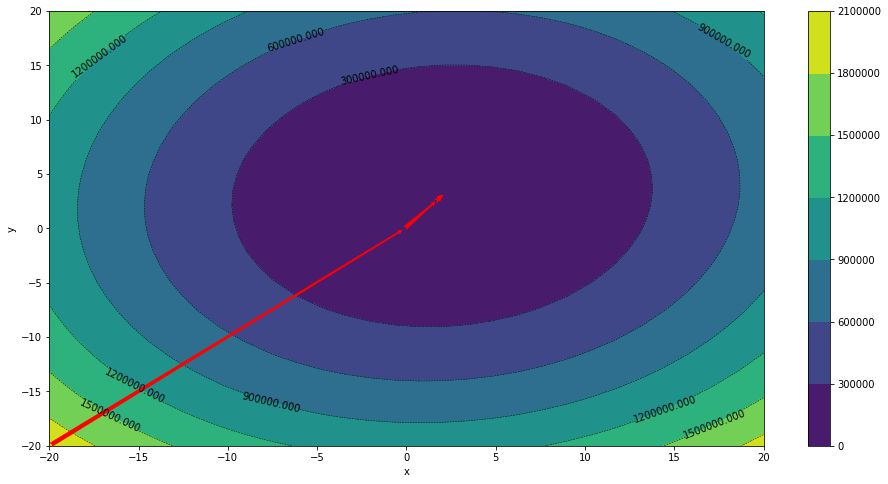


Part B for alpha = 0.00022217566030767466


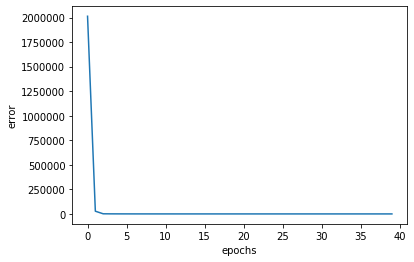


Iteration: 0 - Error: 2013430.7948
Iteration: 5 - Error: 175.7847
Iteration: 10 - Error: 4.7679
Iteration: 15 - Error: 0.2289
Iteration: 20 - Error: 0.0111
Completed Gradient Descent
W = [1.99993302 2.99990757 0.00716086] when alpha = 0.000333263490461512
Total number of epochs = 24

Part A for alpha = 0.000333263490461512


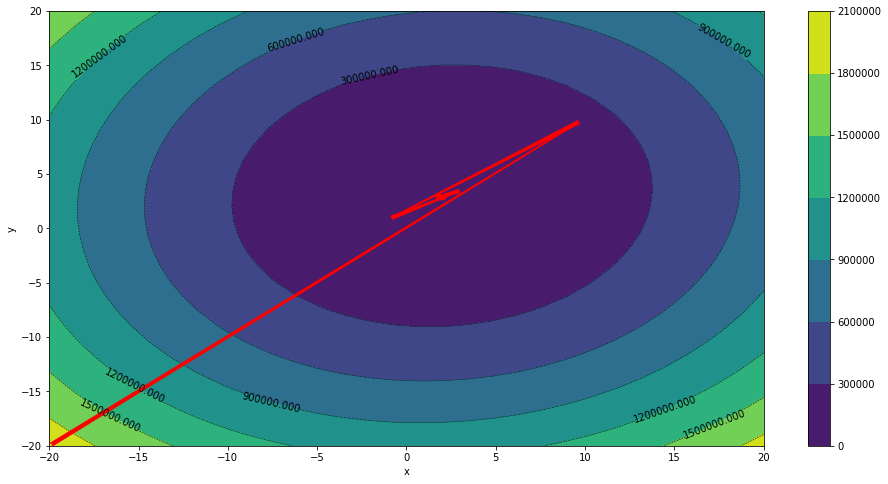


Part B for alpha = 0.000333263490461512


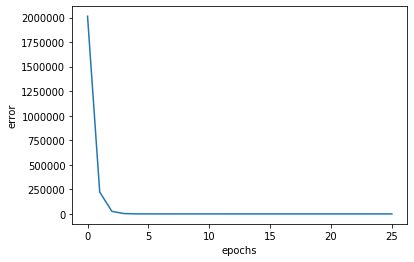

In [126]:
def gradient_descent(w,x,e,alpha,X,Y,Z):
    errors = []
    old_w = []
    old_w.append(np.array((w[0],w[1])))

    for i in range(200):
        gradient,error = get_gradient(w,x,e)
        new_w = w - np.dot(alpha,gradient)
#         print(gradient)

        if i%5 == 0:
            print("Iteration: %d - Error: %.4f" % (i, error))
        old_w.append(np.array((new_w[0],new_w[1])))
        errors.append(error)

        if error < 0.001:
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)
            print("Completed Gradient Descent")
            break

        w = new_w

    print("W = "+str(w)+" when alpha = "+str(alpha))
    print("Total number of epochs = "+str(i))
    print()
    
    print("Part A for alpha = "+str(alpha))
    plot_contour(X,Y,Z,old_w)
    print()
    
    print("Part B for alpha = "+str(alpha))
    plt.plot(errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    plt.show()
    
    print()
    
w = np.array((-20,-20,0))
x = np.array((x1,x2,np.ones(400)))
    
alpha_opt = get_alpha(x)
alphas = [(0.9*alpha_opt)/2,(1.5*alpha_opt)/2,alpha_opt,1.5*alpha_opt]

for alpha in alphas:
    w = np.array((-20,-20,0))
    x = np.array((x1,x2,np.ones(400)))
    gradient_descent(w,x,e,alpha,X,Y,Z)

### <center> Problem-2 <center>

- The objective function $J(x,y)$ (Rosenbrock function) is given by:
\begin{equation}
    J(x,y) = x^2 + 100(y-x^2)^2
\end{equation}
- The derivatives of the objective function are as follows:
\begin{equation}
    \frac{\partial{J(x,y)}}{\partial{x}} = 2x + 400x(y-x^2)\\
    \frac{\partial{J(x,y)}}{\partial{y}} = 200y + 200(x^2)\\   
\end{equation}

In [127]:
def J_function(X,Y):
    Z = (X)**2 + 100.*(Y-X**2)**2

    return Z

def get_gradient(w):
    x = w[0]
    y = w[1]

    dell_x = 2*x - 400*x*(y-x**2)
    dell_y = 200*y - 200*(x**2)

    w_1 = np.array((dell_x,dell_y))

    error = x**2 + 100*(y-x**2)**2

    return w_1,error

### Plot of the objective function

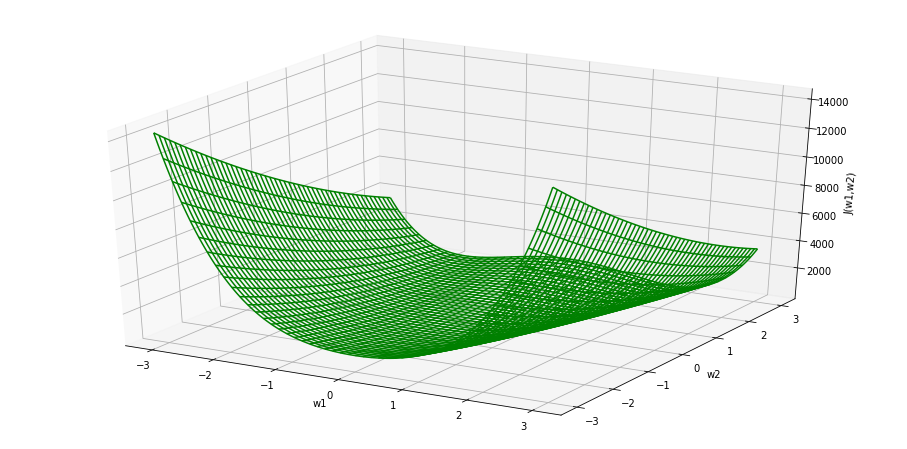

In [128]:
x1 = np.linspace(-3,3,250)
x2 = np.linspace(-3,3,250)

X,Y = np.meshgrid(x1,x2)

Z = J_function(X,Y)
plot_J(X,Y,Z)

- We can see this is a non-convex function so if value of $x,y$ are close to $0$, then it will converge else it can diverge.

### 2.1 Gradient descent with constant step size

- The update equation for the gradient descent with constant step size is given as follows:
\begin{equation}
    W = W - \eta\nabla J(w1,w2)
\end{equation}

Iteration: 0 - Error: 15.5818
Iteration: 100 - Error: 0.1687
Iteration: 200 - Error: 0.1314
Iteration: 300 - Error: 0.0999
Iteration: 400 - Error: 0.0742
Iteration: 500 - Error: 0.0540
Iteration: 600 - Error: 0.0385
Iteration: 700 - Error: 0.0270
Iteration: 800 - Error: 0.0187
Iteration: 900 - Error: 0.0128
Iteration: 1000 - Error: 0.0088
Iteration: 1100 - Error: 0.0059
Iteration: 1200 - Error: 0.0040
Iteration: 1300 - Error: 0.0027
Iteration: 1400 - Error: 0.0018
Iteration: 1500 - Error: 0.0012
Completed Gradient Descent
W = [-0.03159829  0.00101872] when alpha = 0.001
Total number of epochs = 1550

Part A for alpha = 0.001


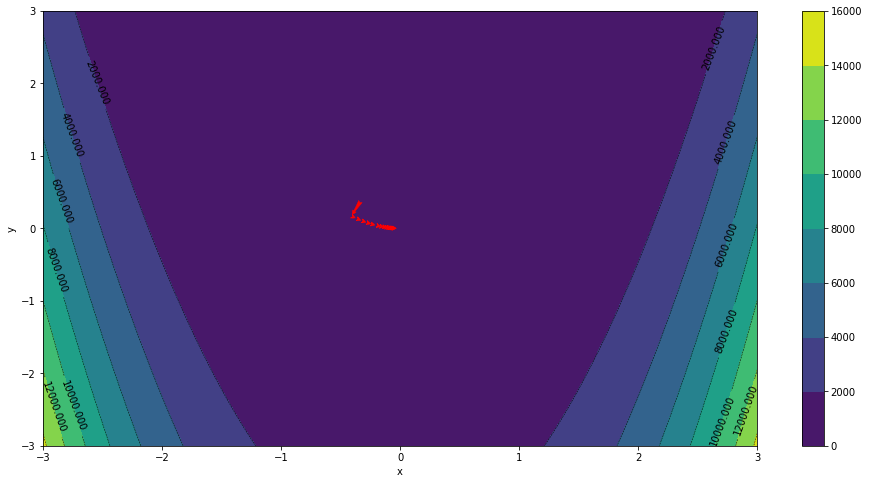


Part B for alpha = 0.001


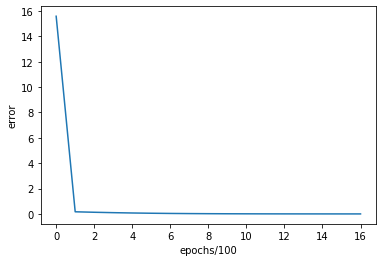

In [129]:
def gradient_descent(w,alpha,X,Y,Z):
    old_w = []
    errors = []

    i = 0
    while 1:
        gradient,error = get_gradient(w)

        new_w = w - alpha*gradient

        if i%100 == 0:
            print("Iteration: %d - Error: %.4f" % (i, error))
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)

        if error < 0.001 or i > 20000:
            if error < 0.001:
                print("Completed Gradient Descent")
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)
            break

        w = new_w
        i = i+1
        
    print("W = "+str(w)+" when alpha = "+str(alpha))
    print("Total number of epochs = "+str(i))
    print()

    print("Part A for alpha = "+str(alpha))
    plot_contour(X,Y,Z,old_w)
    print()

    print("Part B for alpha = "+str(alpha))
    plt.plot(range(len(errors)),errors)
    plt.xlabel('epochs/100')
    plt.ylabel('error')
    plt.show()

    print()

w = np.array((np.random.normal(),np.random.normal()))
alpha = 0.001

gradient_descent(w,alpha,X,Y,Z)

### 2.2 Gradient descent with Polyak's momentum method

- Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the gradient with V (which stands for velocity), the exponential moving average of current and past gradients.

\begin{equation}
    W_{t+1} = W_t - \eta V_t\\
    V_{t} = \beta V_{t-1} + (1-\beta)\nabla J(w_1,w_2)
\end{equation}

Iteration: 0 - Error: 113.3372
Iteration: 100 - Error: 0.8450
Iteration: 200 - Error: 0.4819
Iteration: 300 - Error: 0.1971
Iteration: 400 - Error: 0.0446
Iteration: 500 - Error: 0.0058
Completed Gradient Descent
W = [-0.0312932   0.00099679] when alpha = 0.005
Total number of epochs = 581

Part A for alpha = 0.005


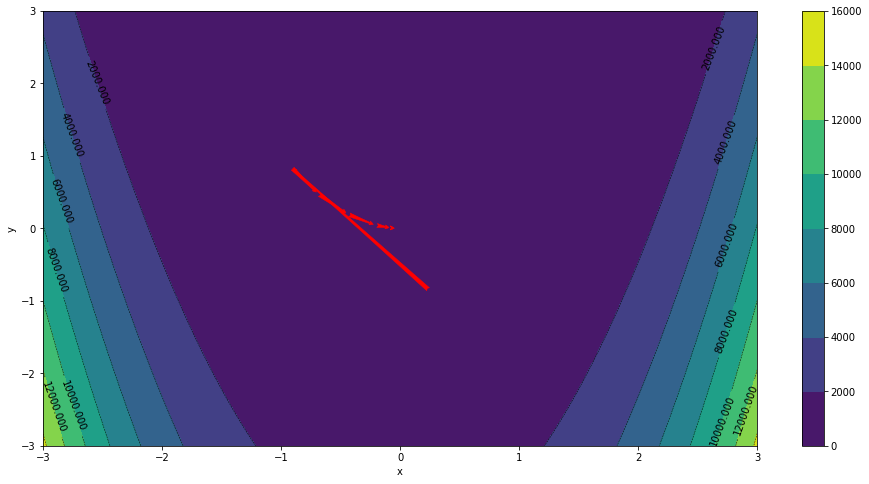


Part B for alpha = 0.005


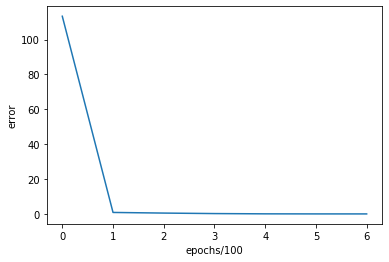

In [130]:
def gradient_polyak(w,alpha,beta,V,X,Y,Z):
    old_w = []
    errors = []

    i = 0
    while 1:
        gradient,error = get_gradient(w)

        t = beta*V+(1-beta)*gradient

        new_w = w - alpha*t

        if i%100 == 0:
            print("Iteration: %d - Error: %.4f" % (i, error))
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)

        if error < 0.001 or i > 20000:
            if error < 0.001:
                print("Completed Gradient Descent")
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)
            break

        w = new_w

        V = t

        i = i+1
        
    print("W = "+str(w)+" when alpha = "+str(alpha))
    print("Total number of epochs = "+str(i))
    print()

    print("Part A for alpha = "+str(alpha))
    plot_contour(X,Y,Z,old_w)
    print()

    print("Part B for alpha = "+str(alpha))
    plt.plot(errors)
    plt.xlabel('epochs/100')
    plt.ylabel('error')
    plt.show()

    print()

    
w = np.array((np.random.normal(),np.random.normal()))

alpha = 0.005
beta = 0.9

V = np.array((0,0))

gradient_polyak(w,alpha,beta,V,X,Y,Z)
    

### 2.3 Nestrov's accelerated gradient descent

- This is similar to polyak's methods but utilizes projected gradients instead of simple gradients.
\begin{equation}
    W_{t+1} = W_t - \eta V_t\\
    V_{t} = \beta V_{t-1} + (1-\beta)\nabla_{W^{*}} J(w_1,w_2)\\
    W^{*} = W_{t} - \eta V_{t-1}
\end{equation}

where $\nabla_{W^{*}} J(w_1,w_2)$ are the projected gradients.

Iteration: 0 - Error: 880.9915
Iteration: 100 - Error: 0.9817
Iteration: 200 - Error: 0.9027
Iteration: 300 - Error: 0.8251
Iteration: 400 - Error: 0.7492
Iteration: 500 - Error: 0.6752
Iteration: 600 - Error: 0.6033
Iteration: 700 - Error: 0.5338
Iteration: 800 - Error: 0.4670
Iteration: 900 - Error: 0.4035
Iteration: 1000 - Error: 0.3435
Iteration: 1100 - Error: 0.2877
Iteration: 1200 - Error: 0.2364
Iteration: 1300 - Error: 0.1903
Iteration: 1400 - Error: 0.1498
Iteration: 1500 - Error: 0.1151
Iteration: 1600 - Error: 0.0863
Iteration: 1700 - Error: 0.0632
Iteration: 1800 - Error: 0.0453
Iteration: 1900 - Error: 0.0319
Iteration: 2000 - Error: 0.0221
Iteration: 2100 - Error: 0.0152
Iteration: 2200 - Error: 0.0103
Iteration: 2300 - Error: 0.0070
Iteration: 2400 - Error: 0.0047
Iteration: 2500 - Error: 0.0031
Iteration: 2600 - Error: 0.0021
Iteration: 2700 - Error: 0.0014
Completed Gradient Descent
W = [0.03165083 0.00102178] when alpha = 0.001
Total number of epochs = 2783

Part A fo

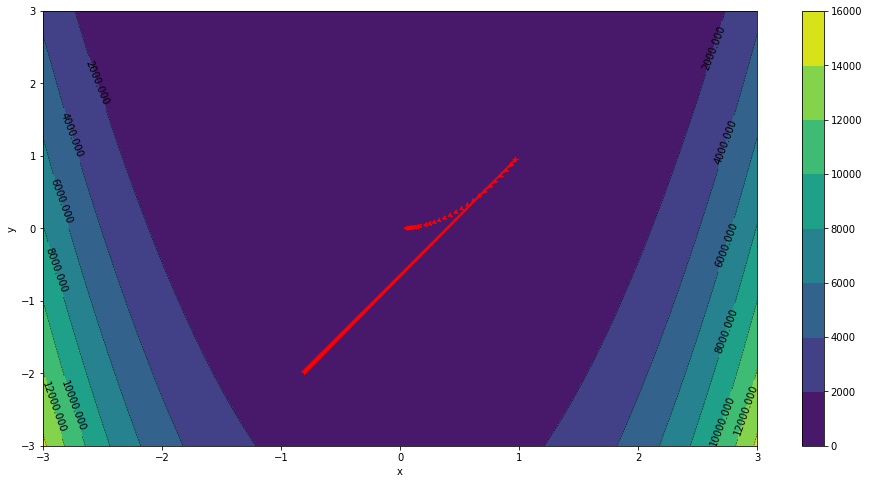


Part B for alpha = 0.001


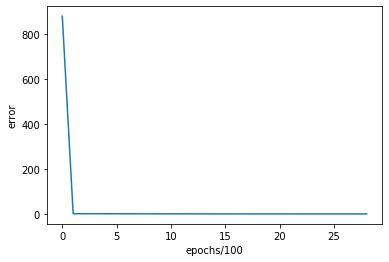

In [131]:
def gradient_nestrov(w,alpha,beta,V,X,Y,Z):
    old_w = []
    errors = []

    i = 0
    while 1:

        w_ = w - alpha*V

        gradient,error = get_gradient(w_)

        t = beta*V+(1-beta)*gradient

        new_w = w - alpha*t

        if i%100 == 0:
            print("Iteration: %d - Error: %.4f" % (i, error))
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)

        if error < 0.001 or i>20000:
            if error < 0.001:
                print("Completed Gradient Descent")
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)
            break

        w = new_w

        V = t

        i = i+1
    print("W = "+str(w)+" when alpha = "+str(alpha))
    print("Total number of epochs = "+str(i))
    print()

    print("Part A for alpha = "+str(alpha))
    plot_contour(X,Y,Z,old_w)
    print()

    print("Part B for alpha = "+str(alpha))
    plt.plot(errors)
    plt.xlabel('epochs/100')
    plt.ylabel('error')
    plt.show()

    print()
        
w = np.array((np.random.normal(),np.random.normal()))
        
alpha = 0.001
beta = 0.9

V = np.array((0,0))
gradient_nestrov(w,alpha,beta,V,X,Y,Z)

### 2.4 Gradient descent with Adam Optimizer

- Adaptive moment estimation, or Adam optimizes as follows:
    - It acts upon the gradient component by using $V$, the exponential average of gradients.
    - It acts upon the learning rate component by dividing the learning rate $\eta$ by square root of $S$, the exponential moving average of squared gradients.
    
\begin{equation}
    W_{t+1} = W_t - \frac{\alpha}{\sqrt{\hat{S}_t}+\epsilon} \hat{V}_t\\
    \hat{V}_t = \frac{V_t}{1-\beta^{t}_1}\\
    \hat{S}_t = \frac{S_t}{1-\beta^{t}_2}
\end{equation}

\begin{equation}
      V_{t} = \beta_1 V_{t-1} + (1 - \beta_1)\nabla J(w_1,w_2)\\
      S_{t} = \beta_2 V_{t-1} + (1 - \beta_2)\nabla^2 J(w_1,w_2)
\end{equation}

Iteration: 0 - Error: 880.9915
Iteration: 100 - Error: 727.5547
Iteration: 200 - Error: 606.8345
Iteration: 300 - Error: 510.8983
Iteration: 400 - Error: 433.6834
Iteration: 500 - Error: 370.7576
Iteration: 600 - Error: 318.8544
Iteration: 700 - Error: 275.5480
Iteration: 800 - Error: 239.0223
Iteration: 900 - Error: 207.9081
Iteration: 1000 - Error: 181.1654
Iteration: 1100 - Error: 157.9991
Iteration: 1200 - Error: 137.7964
Iteration: 1300 - Error: 120.0823
Iteration: 1400 - Error: 104.4848
Iteration: 1500 - Error: 90.7103
Iteration: 1600 - Error: 78.5240
Iteration: 1700 - Error: 67.7359
Iteration: 1800 - Error: 58.1897
Iteration: 1900 - Error: 49.7546
Iteration: 2000 - Error: 42.3190
Iteration: 2100 - Error: 35.7858
Iteration: 2200 - Error: 30.0689
Iteration: 2300 - Error: 25.0908
Iteration: 2400 - Error: 20.7804
Iteration: 2500 - Error: 17.0720
Iteration: 2600 - Error: 13.9041
Iteration: 2700 - Error: 11.2193
Iteration: 2800 - Error: 8.9634
Iteration: 2900 - Error: 7.0854
Iteration

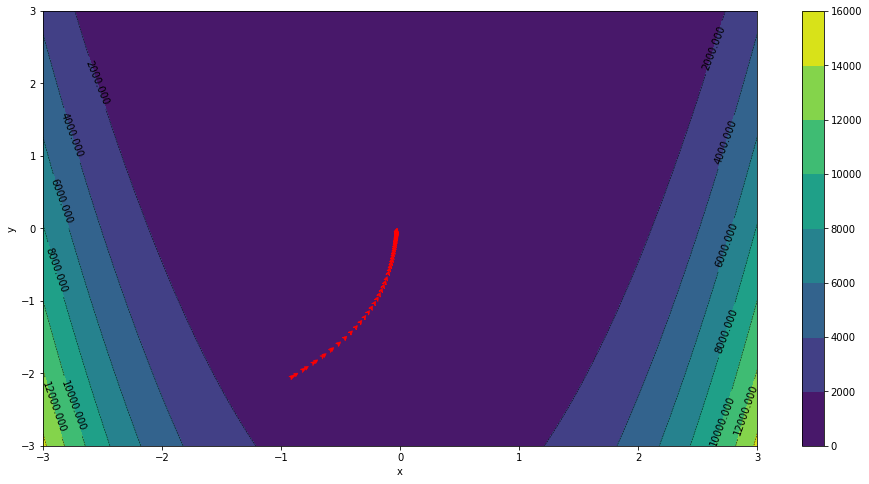


Part B for alpha = 0.001


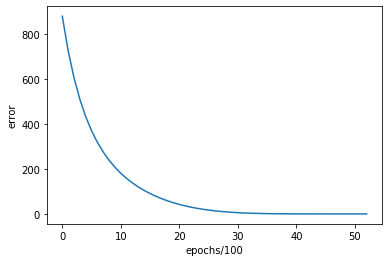

In [132]:
def gradient_adam(w,alpha,beta1,beta2,epsilon,V,S,X,Y,Z):
    old_w = []
    errors = []

    i = 0
    while 1:

        gradient,error = get_gradient(w)


        V_t = beta1*V + (1-beta1)*gradient
        S_t = beta2*S + (1-beta2)*(gradient**2)

        V_ = V_t/(1- beta1**(i+1))
        S_ = S_t/(1- beta2**(i+1))

        t = np.multiply(alpha/(np.sqrt(S_)+epsilon),V_)

        new_w = w - t

        if i%100 == 0:
            print("Iteration: %d - Error: %.4f" % (i, error))
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)

        if error < 0.001 or i > 20000:
            if error < 0.001:
                print("Completed Gradient Descent")
            old_w.append(np.array((new_w[0],new_w[1])))
            errors.append(error)
            break

        w = new_w

        V = V_t
        S = S_t

        i = i+1
    print("W = "+str(w)+" when alpha = "+str(alpha))
    print("Total number of epochs = "+str(i))
    print()

    print("Part A for alpha = "+str(alpha))
    plot_contour(X,Y,Z,old_w)
    print()

    print("Part B for alpha = "+str(alpha))
    plt.plot(errors)
    plt.xlabel('epochs/100')
    plt.ylabel('error')
    plt.show()

    print()   
    
        
alpha = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 0.00000001

V = np.array((0,0))
S = np.array((0,0))

gradient_adam(w,alpha,beta1,beta2,epsilon,V,S,X,Y,Z)

### <center> Problem-3 <center>

- The objective function $J(x,y)$ is given by:
\begin{equation}
    J(x,y) = \frac{50(x^2+y^2)^3}{9} - \frac{209(x^2+y^2)^2}{18} + \frac{59(x^2+y^2)}{9}
\end{equation}
- The derivatives of the objective function are as follows:
\begin{equation}
    \frac{\partial{J(x,y)}}{\partial{x}} = \frac{100x(x^2+y^2)^2}{3} - \frac{209x(x^2+y^2)}{3} + \frac{118x}{9}\\
    \frac{\partial{J(x,y)}}{\partial{y}} = \frac{100y(x^2+y^2)^2}{3} - \frac{209y(x^2+y^2)}{3} + \frac{118y}{9}\\
\end{equation}

In [133]:
def J_function(X,Y):
    Z = (50/9)*((X**2+Y**2)**3) - (209/18)*(X**2+Y**2)**2 + (59/9)*(X**2+Y**2)

    return Z

def get_gradient(w):
    x = w[0]
    y = w[1]

    dell_x = (100/3)*x*((x**2+y**2)**2) - (209/9)*2*x*(x**2+y**2) + (118/9)*x
    dell_y = (100/3)*y*((x**2+y**2)**2) - (209/9)*2*y*(x**2+y**2) + (118/9)*y

    w_1 = np.array((dell_x,dell_y))

    error = (50/9)*((x**2+y**2)**3) - (209/18)*(x**2+y**2)**2 + (59/9)*(x**2+y**2)

    return w_1,error

### Plot of objective function

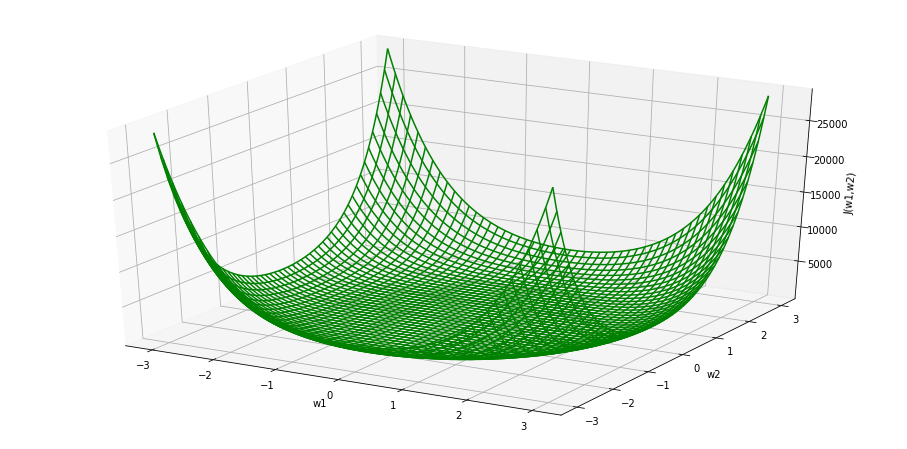

In [15]:
x1 = np.linspace(-3,3,250)
x2 = np.linspace(-3,3,250)

X,Y = np.meshgrid(x1,x2)

Z = J_function(X,Y)
plot_J(X,Y,Z)

- We see that the function is convex but it has a local minima at $x^2+y^2 = 1$, so while performing gradient descent we might get stuck in local minima.
- If we randomly initialize $W$, then it can lead to some problems.
- In order to get convergence, we can initialize $x,y$ such that $x^2+y^2 < 1$.

### 3.1 Gradient descent with constant step size

Iteration: 0 - Error: 0.9202
Iteration: 100 - Error: 0.2467
Iteration: 200 - Error: 0.0217
Iteration: 300 - Error: 0.0016
Completed Gradient Descent
W = [0.0101609  0.00681964] when alpha = 0.001
Total number of epochs = 318

Part A for alpha = 0.001


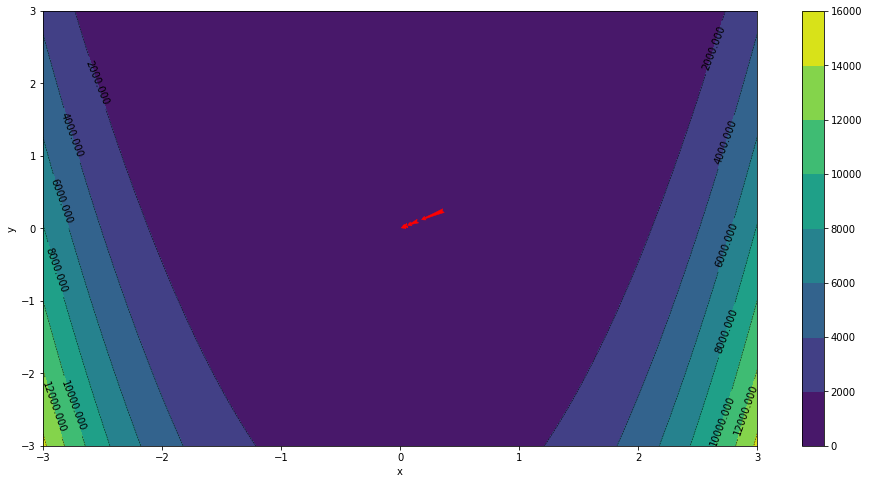


Part B for alpha = 0.001


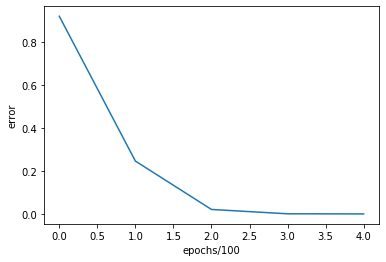

In [136]:
w = np.array((np.random.random(),np.random.random()))
alpha = 0.001

gradient_descent(w,alpha,X,Y,Z)

### 3.2 Gradient descent with Polyak's momentum

Iteration: 0 - Error: 0.7267
Iteration: 100 - Error: 0.1391
Iteration: 200 - Error: 0.0077
Completed Gradient Descent
W = [0.00753985 0.00977157] when alpha = 0.001
Total number of epochs = 267

Part A for alpha = 0.001


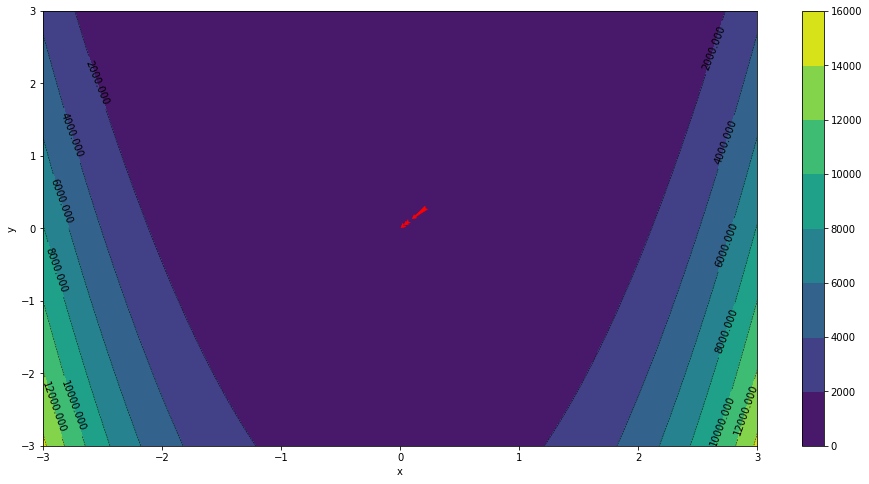


Part B for alpha = 0.001


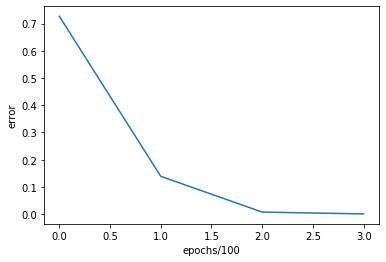

In [139]:
w = np.array((np.random.random(),np.random.random()))


alpha = 0.001
beta = 0.9

V = np.array((0,0))

gradient_polyak(w,alpha,beta,V,X,Y,Z)

### 3.3 Nestrov's accelerated gradient descent

Iteration: 0 - Error: 1.0957
Iteration: 100 - Error: 0.8673
Iteration: 200 - Error: 0.1986
Iteration: 300 - Error: 0.0125
Completed Gradient Descent
W = [0.01234838 0.00113684] when alpha = 0.001
Total number of epochs = 385

Part A for alpha = 0.001


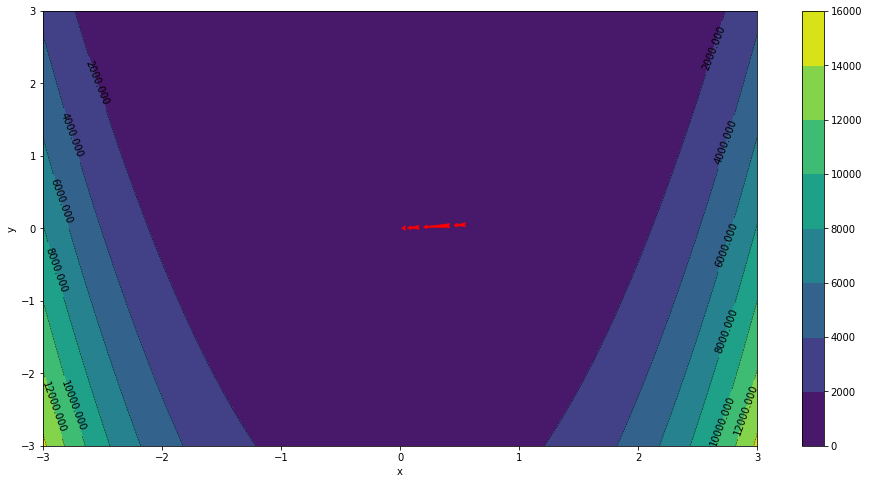


Part B for alpha = 0.001


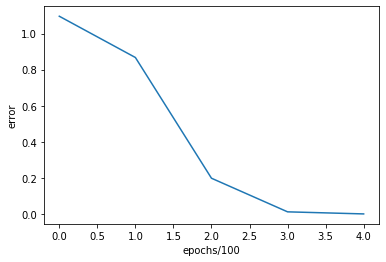

In [141]:
w = np.array((np.random.random(),np.random.random()))


alpha = 0.001
beta = 0.9

V = np.array((0,0))

gradient_nestrov(w,alpha,beta,V,X,Y,Z)

### 3.4 Gradient descent with adam optimizer

Iteration: 0 - Error: 0.5194
Iteration: 100 - Error: 0.2411
Iteration: 200 - Error: 0.0878
Iteration: 300 - Error: 0.0236
Iteration: 400 - Error: 0.0047
Completed Gradient Descent
W = [1.23398195e-02 1.62794959e-11] when alpha = 0.001
Total number of epochs = 482

Part A for alpha = 0.001


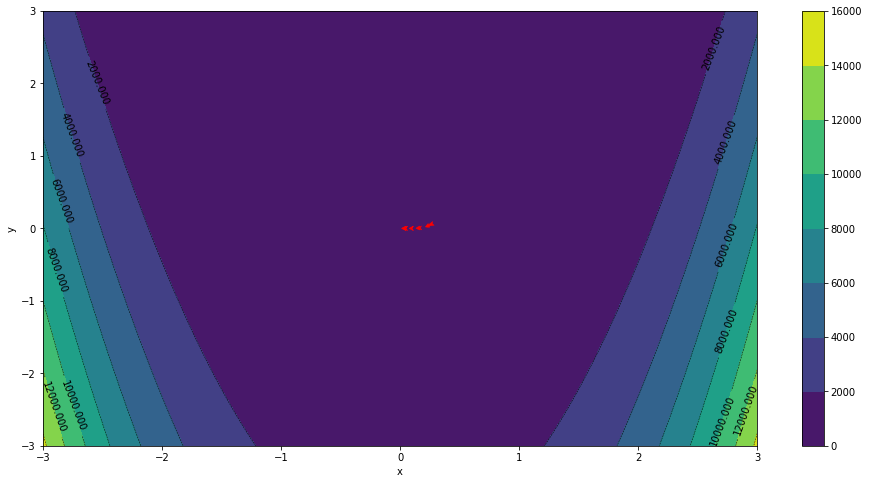


Part B for alpha = 0.001


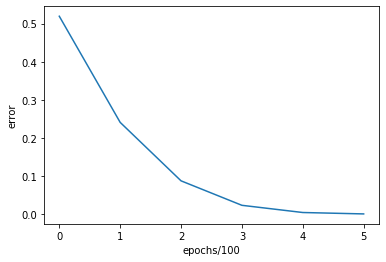

In [145]:
w = np.array((np.random.random(),np.random.random()))


alpha = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 0.00000001

V = np.array((0,0))
S = np.array((0,0))

gradient_adam(w,alpha,beta1,beta2,epsilon,V,S,X,Y,Z)

## <center> Problem-4 <center>

- The objective function $J(W)$ is given by:
\begin{equation}
    J(W) = [X^{T}W - Y]^{T}[X^{T}W - Y]
\end{equation}
where: 
    - the weight matrix be given as follows:
\begin{equation}
    W = \begin{bmatrix}w_{1} \\ w_{2} \\ 1\end{bmatrix} \in R^{3 \times 1}
\end{equation}
- The samples for training are as follows:
\begin{equation}
    X = \begin{bmatrix}x_{1} \\ x_{2} \\ 1\end{bmatrix} \in R^{3 \times 400}\\
    Y = \begin{bmatrix}y_{1}\end{bmatrix} \in R^{1 \times 400}
\end{equation}
- The samples for testing are as follows:
\begin{equation}
    X_{test} = \begin{bmatrix}x_{1} \\ x_{2} \\ 1\end{bmatrix} \in R^{3 \times 200}\\
    Y_{test} = \begin{bmatrix}y_{1}\end{bmatrix} \in R^{1 \times 200}
\end{equation}

- The derivatives of the objective function are as follows:
\begin{equation}
    \frac{\partial{J(W)}}{\partial{W}} = 2[X^{T}XW - X^{T}Y]\\   
\end{equation}

### 1.3 Finding learning rate empirically

In [146]:
def get_gradient(W,X,Y):
    G = np.dot(X,W)
    J = np.dot(G-Y,G-Y)
    # A = Jacobian(np.dot(X,W))
    # J_g = 2*np.dot(np.dot(X.T,A),my_tanh(np.dot(X,W)))-2*np.dot(np.dot(X.T,A),Y)
    J_g = 2*(np.dot(np.dot(X.T,X),W)-np.dot(X.T,Y))

    return J_g,J

def gradient_descent(W,X,Y,alpha,X_test,Y_test):
    errors = []
    errors_test = []
    old_W = []
    for i in range(1000):
        gradient,error = get_gradient(W,X,Y)

        new_W = W - alpha*gradient


        if i%100 == 0:
            print("Iteration: %d - Error: %.4f" % (i, error))
        old_W.append(np.array((new_W[0],new_W[1])))
        errors.append(error)
        errors_test.append(200-np.count_nonzero(np.sign(np.dot(X_test,W)) == Y_test))

        if error < 0.001:
            old_w.append(np.array((new_W[0],new_W[1])))
            errors.append(error)
            errors_test.append(200-np.count_nonzero(np.sign(np.dot(X_test,W)) == Y_test))
            
            print("Completed Gradient Descent")
            break

        W = new_W
        
    print("W = "+str(W)+" when alpha = "+str(alpha))
    print("Total number of epochs = "+str(i))
    print()
    
    A = np.sign(np.dot(X_test,W))
    print(A)
    print(np.count_nonzero(A==Y_test)*100.0/200)

    plt.plot(errors)
    plt.xlabel('epochs')
    plt.ylabel('error_training')
    plt.show()
    
    plt.plot(errors_test)
    plt.xlabel('epochs')
    plt.ylabel('error_testing')
    plt.show()

    print()
    
    return W



Iteration: 0 - Error: 1028.9738
Iteration: 100 - Error: 130.2842
Iteration: 200 - Error: 130.1133
Iteration: 300 - Error: 130.1132
Iteration: 400 - Error: 130.1132
Iteration: 500 - Error: 130.1132
Iteration: 600 - Error: 130.1132
Iteration: 700 - Error: 130.1132
Iteration: 800 - Error: 130.1132
Iteration: 900 - Error: 130.1132
W = [-0.06824337  0.12636689 -0.0190625 ] when alpha = 5e-05
Total number of epochs = 999

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

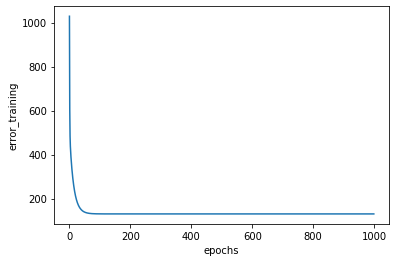

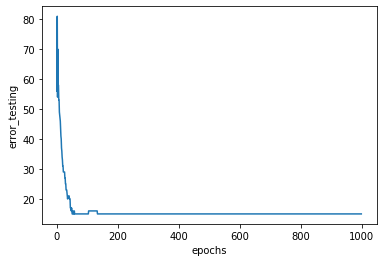


Iteration: 0 - Error: 4684.1740
Iteration: 100 - Error: 207.8171
Iteration: 200 - Error: 147.1578
Iteration: 300 - Error: 133.8520
Iteration: 400 - Error: 130.9333
Iteration: 500 - Error: 130.2931
Iteration: 600 - Error: 130.1526
Iteration: 700 - Error: 130.1218
Iteration: 800 - Error: 130.1151
Iteration: 900 - Error: 130.1136
W = [-0.06826468  0.1263416  -0.01857189] when alpha = 1e-05
Total number of epochs = 999

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.

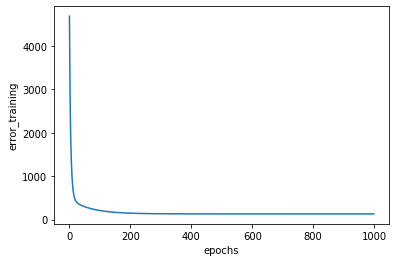

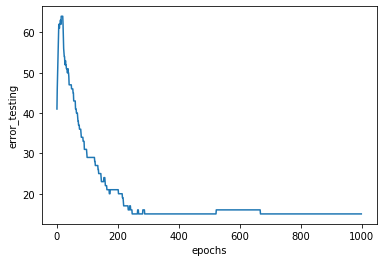


Iteration: 0 - Error: 1587.2335
Iteration: 100 - Error: 130.1490
Iteration: 200 - Error: 130.1132
Iteration: 300 - Error: 130.1132
Iteration: 400 - Error: 130.1132
Iteration: 500 - Error: 130.1132
Iteration: 600 - Error: 130.1132
Iteration: 700 - Error: 130.1132
Iteration: 800 - Error: 130.1132
Iteration: 900 - Error: 130.1132
W = [-0.06824337  0.12636689 -0.0190625 ] when alpha = 6e-05
Total number of epochs = 999

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.

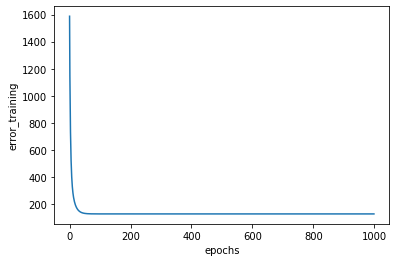

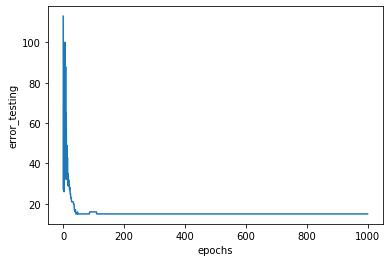

In [147]:
u1 = np.array((-3,4))
u2 = np.array((4,-3))

Cov = np.array(((16,0),(0,9)))

train_x1 = np.random.multivariate_normal(u1,Cov,200)
train_y1 = np.ones(200)
train_x2 = np.random.multivariate_normal(u2,Cov,200)
train_y2 = -np.ones(200)

test_x1 = np.random.multivariate_normal(u1,Cov,100)
test_y1 = np.ones(100)

test_x2 = np.random.multivariate_normal(u2,Cov,100)
test_y2 = -np.ones(100)

X = np.hstack((np.vstack((train_x1.T,train_y1)),np.vstack((train_x2.T,train_y1)))).T
Y = np.hstack((train_y1,train_y2))

X_test = np.hstack((np.vstack((test_x1.T,test_y1)),np.vstack((test_x2.T,test_y1)))).T
Y_test = np.hstack((test_y1,test_y2))
# W = np.array((0,0,1))


# A = np.dot(X,W)

# Jacobian(A)

alpha = [0.00005,0.00001,0.00006]
W = np.array((np.random.random(),np.random.random(),1))


for alphas in alpha:
    W = np.array((np.random.random(),np.random.random(),1))
    W = gradient_descent(W,X,Y,alphas,X_test,Y_test)

- We see from the above that alpha $\in [0.00001,0.00006]$ give high accuracies of about $90\%-95\%$.

### 1.4 Why there is no danger of overfitting/ overtraining in this case

- As we have not used any activation function, we get a linear decision boundary between the two classes. Due to this there cannot be overfitting on the training set as the discriminant is linear.
- In order to have some kind of overfitting we some kind of non-linearity (activation) while training.

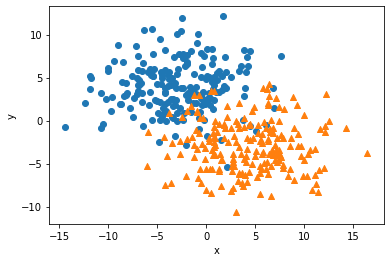

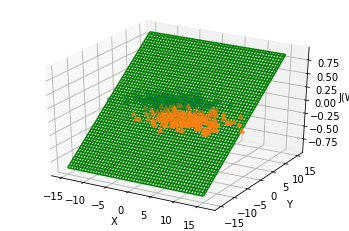

In [148]:
%matplotlib inline
plt.scatter(train_x1.T[0],train_x1.T[1],marker = 'o')
plt.scatter(train_x2.T[0],train_x2.T[1],marker = '^')
plt.xlabel('x')
plt.ylabel('y')

plt.show()
x1 = np.linspace(-15,15,200)
x2 = np.linspace(-15,15,200)
C = np.ones(200)

X,Y = np.meshgrid(x1,x2)

Z = W[0]*Y+W[1]*Y+W[2]*C

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color = 'green')
ax.scatter(train_x1.T[0],train_x1.T[1],marker = 'o')
ax.scatter(train_x2.T[0],train_x2.T[1],marker = '^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('J(W)')
plt.show()
# plt.plot(W[0],W[1])
# print(W)
# plt.show()

### 1.5 Can it achieve least possible error.

- Yes, it can achieve the least possible error as the gaussains have the same covariance matrix so the dicriminant between them will be linear.
- By minimizing the above objective function, we can come close to the linear discriminant between the two gaussians. 

### 1.6 Normalise the data

Iteration: 0 - Error: 1452.8646
Iteration: 100 - Error: 131.0922
Iteration: 200 - Error: 130.1270
Iteration: 300 - Error: 130.1134
Iteration: 400 - Error: 130.1132
Iteration: 500 - Error: 130.1132
Iteration: 600 - Error: 130.1132
Iteration: 700 - Error: 130.1132
Iteration: 800 - Error: 130.1132
Iteration: 900 - Error: 130.1132
W = [-3.72746817e-01  5.72133760e-01  1.41853414e-17] when alpha = 5e-05
Total number of epochs = 999

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

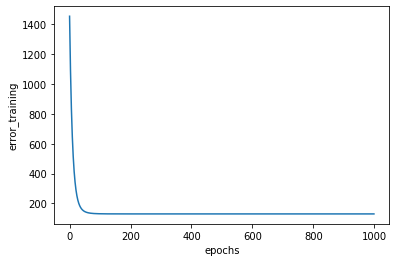

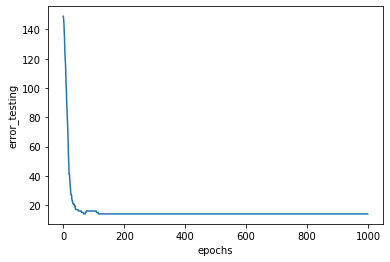


Iteration: 0 - Error: 1047.5721
Iteration: 100 - Error: 270.3756
Iteration: 200 - Error: 157.3585
Iteration: 300 - Error: 136.8611
Iteration: 400 - Error: 132.1843
Iteration: 500 - Error: 130.8586
Iteration: 600 - Error: 130.4093
Iteration: 700 - Error: 130.2373
Iteration: 800 - Error: 130.1666
Iteration: 900 - Error: 130.1365
W = [-3.67758329e-01  5.77114293e-01  3.24841984e-04] when alpha = 1e-05
Total number of epochs = 999

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.

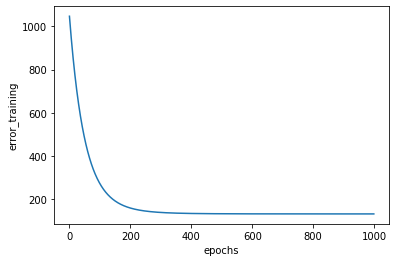

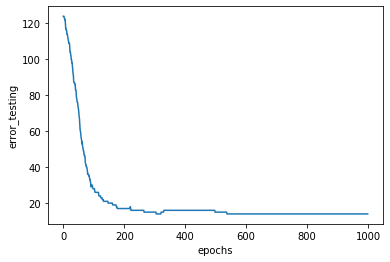


Iteration: 0 - Error: 966.1452
Iteration: 100 - Error: 130.4433
Iteration: 200 - Error: 130.1153
Iteration: 300 - Error: 130.1132
Iteration: 400 - Error: 130.1132
Iteration: 500 - Error: 130.1132
Iteration: 600 - Error: 130.1132
Iteration: 700 - Error: 130.1132
Iteration: 800 - Error: 130.1132
Iteration: 900 - Error: 130.1132
W = [-3.72746818e-01  5.72133759e-01  1.23183935e-17] when alpha = 6e-05
Total number of epochs = 999

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. 

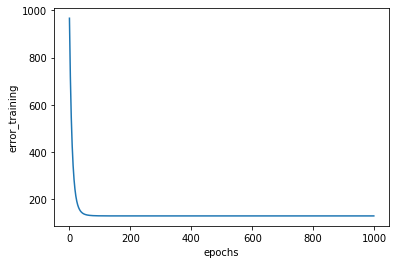

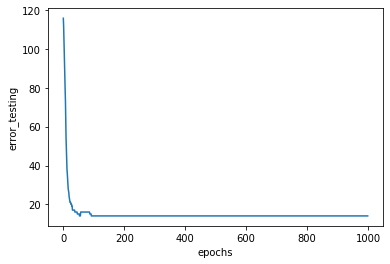

In [149]:
m1 = np.mean(np.hstack((train_x1.T,train_x2.T)).T,axis = 0)
m2 = np.std(np.hstack((train_x1.T,train_x2.T)).T,axis = 0)

# l1 = np.mean(train_x2,axis = 0)
# l2 = np.std(train_x2,axis = 0)

for i in range(200):
    train_x1[i] = (train_x1[i]-m1)/(m2)
    train_x2[i] = (train_x2[i]-m1)/(m2)
    
X = np.hstack((np.vstack((train_x1.T,train_y1)),np.vstack((train_x2.T,train_y1)))).T
Y = np.hstack((train_y1,train_y2))
# W = np.array((np.random.normal(),np.random.normal(),1))


X_test = np.hstack((np.vstack((test_x1.T,test_y1)),np.vstack((test_x2.T,test_y1)))).T
Y_test = np.hstack((test_y1,test_y2))


alpha = [0.00005,0.00001,0.00006]
W = np.array((np.random.random(),np.random.random(),1))


for alphas in alpha:
    W = np.array((np.random.random(),np.random.random(),1))
    W = gradient_descent(W,X,Y,alphas,X_test,Y_test)

- We see from the above that alpha $\in [0.00001,0.00006]$ give high accuracies of about $90\%-95\%$.

## <center> Problem-5 <center>

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [151]:
data = np.matrix(pd.read_excel("Concrete_Data.xls"))
X = data[:,:-1]
Y = data[:,-1]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_test = np.ravel(Y_test)
Y_train = np.ravel(Y_train)
table = []

### 5.1.1 Backpropagation with tanh

### 5.1.1.1 Hidden Layers = 25

/home/gaurav/Semester_6/Deep_Learning/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


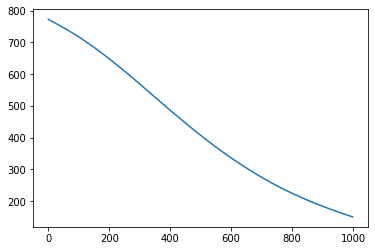

Training error = 300.1495491524452 with hidden layers = 25
Test error = 304.9885009251854 with hidden layers = 25


In [152]:
hidden_layers = 25
activation = 'tanh'
regressor = MLPRegressor(
        hidden_layer_sizes = (hidden_layers,),
        activation = activation,
        batch_size = X_train.shape[0],
        shuffle = True,
        max_iter = 1000
        )

regressor.fit(X_train,Y_train)

Y = regressor.predict(X_test)
Y_ = regressor.predict(X_train)

plt.plot(regressor.loss_curve_)
plt.show()
print("Training error = "+str(np.square(Y_-Y_train).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
print("Test error = "+str(np.square(Y-Y_test).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
table.append([np.square(Y_-Y_train).mean(axis=0),np.square(Y-Y_test).mean(axis=0)])

### 5.1.1.2 Hidden Layers = 50

/home/gaurav/Semester_6/Deep_Learning/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


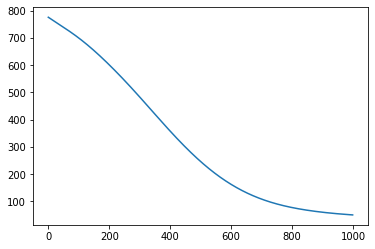

Training error = 99.12007952529383 with hidden layers = 50
Test error = 100.27328407887616 with hidden layers = 50


In [153]:
hidden_layers = 50
activation = 'tanh'
regressor = MLPRegressor(
        hidden_layer_sizes = (hidden_layers,),
        activation = activation,
        batch_size = X_train.shape[0],
        shuffle = True,
        max_iter = 1000
        )

regressor.fit(X_train,Y_train)

Y = regressor.predict(X_test)
Y_ = regressor.predict(X_train)

plt.plot(regressor.loss_curve_)
plt.show()
print("Training error = "+str(np.square(Y_-Y_train).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
print("Test error = "+str(np.square(Y-Y_test).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
table.append([np.square(Y_-Y_train).mean(axis=0),np.square(Y-Y_test).mean(axis=0)])

### 5.1.1.3 Hidden Layers = 75

/home/gaurav/Semester_6/Deep_Learning/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


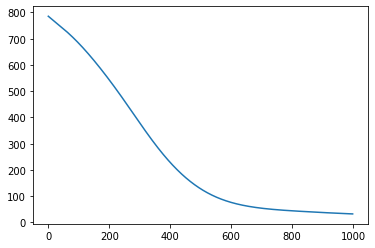

Training error = 65.25832690675962 with hidden layers = 75
Test error = 67.71849145641885 with hidden layers = 75


In [154]:
hidden_layers = 75
activation = 'tanh'
regressor = MLPRegressor(
        hidden_layer_sizes = (hidden_layers,),
        activation = activation,
        batch_size = X_train.shape[0],
        shuffle = True,
        max_iter = 1000
        )

regressor.fit(X_train,Y_train)

Y = regressor.predict(X_test)
Y_ = regressor.predict(X_train)

plt.plot(regressor.loss_curve_)
plt.show()
print("Training error = "+str(np.square(Y_-Y_train).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
print("Test error = "+str(np.square(Y-Y_test).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
table.append([np.square(Y_-Y_train).mean(axis=0),np.square(Y-Y_test).mean(axis=0)])

### 5.1.2 Backpropagation with Relu

### 5.1.2.1 Hidden Layers = 25

/home/gaurav/Semester_6/Deep_Learning/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


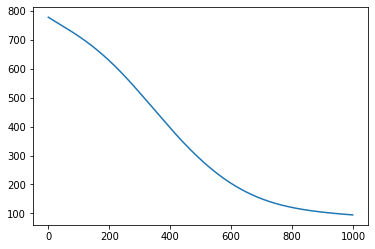

Training error = 189.437439426215 with hidden layers = 25
Test error = 194.60158200076992 with hidden layers = 25


In [155]:
hidden_layers = 25
activation = 'relu'
regressor = MLPRegressor(
        hidden_layer_sizes = (hidden_layers,),
        activation = activation,
        batch_size = X_train.shape[0],
        shuffle = True,
        max_iter = 1000
        )

regressor.fit(X_train,Y_train)

Y = regressor.predict(X_test)
Y_ = regressor.predict(X_train)

plt.plot(regressor.loss_curve_)
plt.show()
print("Training error = "+str(np.square(Y_-Y_train).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
print("Test error = "+str(np.square(Y-Y_test).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
table.append([np.square(Y_-Y_train).mean(axis=0),np.square(Y-Y_test).mean(axis=0)])

### 5.1.2.2 Hidden Layers = 50

/home/gaurav/Semester_6/Deep_Learning/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


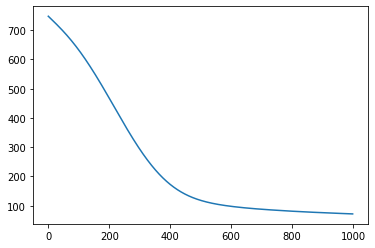

Training error = 144.29475359370696 with hidden layers = 50
Test error = 155.05676625367136 with hidden layers = 50


In [156]:
hidden_layers = 50
activation = 'relu'
regressor = MLPRegressor(
        hidden_layer_sizes = (hidden_layers,),
        activation = activation,
        batch_size = X_train.shape[0],
        shuffle = True,
        max_iter = 1000
        )

regressor.fit(X_train,Y_train)

Y = regressor.predict(X_test)
Y_ = regressor.predict(X_train)

plt.plot(regressor.loss_curve_)
plt.show()
print("Training error = "+str(np.square(Y_-Y_train).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
print("Test error = "+str(np.square(Y-Y_test).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
table.append([np.square(Y_-Y_train).mean(axis=0),np.square(Y-Y_test).mean(axis=0)])

### 5.1.2.3 Hidden Layers = 75

/home/gaurav/Semester_6/Deep_Learning/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


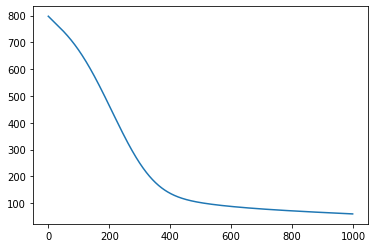

Training error = 119.80099462949919 with hidden layers = 75
Test error = 132.47028431548594 with hidden layers = 75


In [157]:
hidden_layers = 75
activation = 'relu'
regressor = MLPRegressor(
        hidden_layer_sizes = (hidden_layers,),
        activation = activation,
        batch_size = X_train.shape[0],
        shuffle = True,
        max_iter = 1000
        )

regressor.fit(X_train,Y_train)

Y = regressor.predict(X_test)
Y_ = regressor.predict(X_train)

plt.plot(regressor.loss_curve_)
plt.show()
print("Training error = "+str(np.square(Y_-Y_train).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
print("Test error = "+str(np.square(Y-Y_test).mean(axis=0))+" with hidden layers = "+str(hidden_layers))
table.append([np.square(Y_-Y_train).mean(axis=0),np.square(Y-Y_test).mean(axis=0)])

- Observations:
    - As the number of layers increases the final train and test error decreases.
    - We also see that the train_error and test_error are almost similar, which implies that there is no overfitting.

In [158]:
pd.DataFrame(table,columns = ['Train Error','Test Error'],index = ['Backprop with tanh, hidden = 25','Backprop with tanh, hidden = 50','Backprop with tanh, hidden = 75','Backprop with relu, hidden = 25','Backprop with relu, hidden = 50','Backprop with relu, hidden = 75'])

Train Error  Test Error
Backprop with tanh, hidden = 25   300.149549  304.988501
Backprop with tanh, hidden = 50    99.120080  100.273284
Backprop with tanh, hidden = 75    65.258327   67.718491
Backprop with relu, hidden = 25   189.437439  194.601582
Backprop with relu, hidden = 50   144.294754  155.056766
Backprop with relu, hidden = 75   119.800995  132.470284